In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = pd.concat([train, test], sort=False)
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000.0
1,2,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000.0
2,3,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000.0
3,4,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000.0
4,5,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452.0


In [2]:
# Examine the attributes of the dataset
print("{:<20}".format("Attributes of the Russian Housing Market Dataset"))
print("{:<20}".format("------"))
for col in list(df.columns):
    print("{:<20}".format(col))

Attributes of the Russian Housing Market Dataset
------              
id                  
timestamp           
full_sq             
life_sq             
floor               
max_floor           
material            
build_year          
num_room            
kitch_sq            
state               
product_type        
sub_area            
area_m              
raion_popul         
green_zone_part     
indust_part         
children_preschool  
preschool_quota     
preschool_education_centers_raion
children_school     
school_quota        
school_education_centers_raion
school_education_centers_top_20_raion
hospital_beds_raion 
healthcare_centers_raion
university_top_20_raion
sport_objects_raion 
additional_education_raion
culture_objects_top_25
culture_objects_top_25_raion
shopping_centers_raion
office_raion        
thermal_power_plant_raion
incineration_raion  
oil_chemistry_raion 
radiation_raion     
railroad_terminal_raion
big_market_raion    
nuclear_reactor_raion
detention_facili

In [3]:
numeric_columns = df.select_dtypes(exclude=['object']).columns
numeric_columns = numeric_columns[1:]

summaries = []
for attribute in numeric_columns:
    summaries.append(df[attribute].describe())
    print(f'{attribute}\n\nMin: {summaries[-1][3]}\n25%: {summaries[-1][4]}\n50%: {summaries[-1][5]}\n'
          f'75%: {summaries[-1][6]}\nMax: {summaries[-1][7]}\n'
          f'Count: {summaries[-1][0]}\nMean: {summaries[-1][1]}\nStd: {summaries[-1][2]}\n'
          f'--------------------------')


full_sq

Min: 0.0
25%: 38.9
50%: 50.0
75%: 63.0
Max: 5326.0
Count: 38133.0
Mean: 54.11117195080376
Std: 35.17116183363769
--------------------------
life_sq

Min: 0.0
25%: 20.0
50%: 30.0
75%: 43.0
Max: 7478.0
Count: 30574.0
Mean: 34.03345980244652
Std: 47.58152882390085
--------------------------
floor

Min: 0.0
25%: 3.0
50%: 7.0
75%: 11.0
Max: 77.0
Count: 37966.0
Mean: 7.667123215508613
Std: 5.276156463761862
--------------------------
max_floor

Min: 0.0
25%: 9.0
50%: 12.0
75%: 17.0
Max: 117.0
Count: 28561.0
Mean: 12.567592171142467
Std: 6.730495638851137
--------------------------
material

Min: 1.0
25%: 1.0
50%: 1.0
75%: 2.0
Max: 6.0
Count: 28561.0
Mean: 1.834389552186548
Std: 1.4909233150289796
--------------------------
build_year

Min: 0.0
25%: 1966.0
50%: 1980.0
75%: 2006.0
Max: 20052009.0
Count: 23479.0
Mean: 2716.784530857362
Std: 130852.09296841593
--------------------------
num_room

Min: 0.0
25%: 1.0
50%: 2.0
75%: 2.0
Max: 19.0
Count: 28561.0
Mean: 1.9008438079899164
Std: 

raion_build_count_with_builddate_info

Min: 1.0
25%: 186.0
50%: 282.0
75%: 400.0
Max: 1680.0
Count: 31924.0
Mean: 334.38685628367375
Std: 278.5855757436153
--------------------------
build_count_before_1920

Min: 0.0
25%: 0.0
50%: 0.0
75%: 4.0
Max: 371.0
Count: 31924.0
Mean: 19.31894499436161
Std: 61.5284016751729
--------------------------
build_count_1921-1945

Min: 0.0
25%: 0.0
50%: 2.0
75%: 22.0
Max: 382.0
Count: 31924.0
Mean: 28.06167773461972
Std: 63.29636063053383
--------------------------
build_count_1946-1970

Min: 0.0
25%: 30.0
50%: 139.0
75%: 216.0
Max: 845.0
Count: 31924.0
Mean: 143.80303220147852
Std: 124.39747029732251
--------------------------
build_count_1971-1995

Min: 0.0
25%: 38.0
50%: 71.0
75%: 125.0
Max: 246.0
Count: 31924.0
Mean: 80.70871444681117
Std: 57.434917953461024
--------------------------
build_count_after_1995

Min: 0.0
25%: 14.0
50%: 24.0
75%: 57.0
Max: 799.0
Count: 31924.0
Mean: 62.494486906402706
Std: 115.04494082303047
--------------------------
ID

university_km

Min: 0.000281571
25%: 2.180439629
50%: 4.2316606839999995
75%: 9.358961276
Max: 84.86214772
Count: 38133.0
Mean: 6.82366806435211
Std: 6.785484114492931
--------------------------
workplaces_km

Min: 0.0
25%: 1.006485684
50%: 1.9862165840000001
75%: 5.372054387
Max: 55.27822463
Count: 38133.0
Mean: 3.9538304149300343
Std: 5.058337806273642
--------------------------
shopping_centers_km

Min: 0.0
25%: 0.47592396
50%: 0.829027903
75%: 1.477303707
Max: 26.25954309
Count: 38133.0
Mean: 1.4993287180641701
Std: 2.3412232916812155
--------------------------
office_km

Min: 0.0
25%: 0.549294932
50%: 1.052999269
75%: 2.7819954119999997
Max: 19.41319489
Count: 38133.0
Mean: 1.9906975219229017
Std: 2.3484714767223336
--------------------------
additional_education_km

Min: 0.0
25%: 0.485839507
50%: 0.8897348
75%: 1.555985196
Max: 24.26820942
Count: 38133.0
Mean: 1.3272498035685627
Std: 1.5301756712504708
--------------------------
preschool_km

Min: 0.0
25%: 0.289850276
50%: 0.5028

--------------------------
sport_count_1000

Min: 0.0
25%: 0.0
50%: 2.0
75%: 4.0
Max: 25.0
Count: 38133.0
Mean: 2.9508562137780925
Std: 3.3309841458425944
--------------------------
market_count_1000

Min: 0.0
25%: 0.0
50%: 0.0
75%: 1.0
Max: 6.0
Count: 38133.0
Mean: 0.3823197755225133
Std: 0.7331655554417273
--------------------------
green_part_1500

Min: 0.0
25%: 8.47
50%: 15.12
75%: 26.63
Max: 91.41
Count: 38133.0
Mean: 19.222098444916476
Std: 14.241852369269516
--------------------------
prom_part_1500

Min: 0.0
25%: 1.52
50%: 7.78
75%: 15.67
Max: 63.0
Count: 38133.0
Mean: 10.667369732252904
Std: 11.091943737743101
--------------------------
office_count_1500

Min: 0.0
25%: 0.0
50%: 1.0
75%: 4.0
Max: 173.0
Count: 38133.0
Mean: 7.471717410117221
Std: 21.153418963150077
--------------------------
office_sqm_1500

Min: 0.0
25%: 0.0
50%: 19000.0
75%: 122709.0
Max: 2951861.0
Count: 38133.0
Mean: 143381.0946424357
Std: 303873.6539556386
--------------------------
trc_count_1500

Min: 0.0

big_church_count_3000

Min: 0.0
25%: 1.0
50%: 2.0
75%: 5.0
Max: 102.0
Count: 38133.0
Mean: 6.247318595442268
Std: 15.572600567943514
--------------------------
church_count_3000

Min: 0.0
25%: 3.0
50%: 6.0
75%: 11.0
Max: 164.0
Count: 38133.0
Mean: 12.494873206933628
Std: 26.024078373502114
--------------------------
mosque_count_3000

Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 2.0
Count: 38133.0
Mean: 0.19725696902944956
Std: 0.44720870133188917
--------------------------
leisure_count_3000

Min: 0.0
25%: 0.0
50%: 1.0
75%: 2.0
Max: 85.0
Count: 38133.0
Mean: 3.9620276401017493
Std: 13.276473127218573
--------------------------
sport_count_3000

Min: 0.0
25%: 5.0
50%: 19.0
75%: 29.0
Max: 100.0
Count: 38133.0
Mean: 20.500668712139092
Std: 18.889658198325638
--------------------------
market_count_3000

Min: 0.0
25%: 0.0
50%: 2.0
75%: 4.0
Max: 10.0
Count: 38133.0
Mean: 2.34838591246427
Std: 2.2590464845660425
--------------------------
green_part_5000

Min: 3.52
25%: 14.81
50%: 19.89
75%: 31

## Noisy Data

In [4]:
df.loc[(df["build_year"] > 2019) | (df.build_year < 1850)]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
9441,9444,2013-07-25,73.00,73.0,5.0,22.0,1.0,0.0,3.0,0.0,...,1,1,0,1,7,0,0,6,0,5626933.0
9620,9623,2013-08-05,65.00,35.0,7.0,12.0,1.0,1.0,2.0,1.0,...,10,3,0,10,9,0,0,38,4,5415070.0
9700,9703,2013-08-08,60.00,NaN,24.0,24.0,1.0,1.0,2.0,1.0,...,1,1,0,1,7,0,0,6,0,5402275.0
9745,9748,2013-08-09,39.00,39.0,10.0,17.0,1.0,1.0,1.0,12.0,...,1,0,0,2,3,0,0,6,1,3984760.0
9764,9767,2013-08-12,119.00,NaN,24.0,1.0,1.0,1.0,1.0,1.0,...,11,2,1,5,4,0,1,32,5,15696466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7640,38114,2016-05-23,77.51,1.0,4.0,1.0,1.0,1.0,3.0,1.0,...,371,141,26,150,249,2,105,203,13,NaN
7648,38122,2016-05-23,33.89,1.0,3.0,1.0,1.0,1.0,1.0,1.0,...,298,98,16,130,228,2,89,185,14,NaN
7653,38127,2016-05-25,19.91,1.0,8.0,1.0,1.0,1.0,1.0,1.0,...,298,98,16,130,228,2,89,185,14,NaN
7654,38128,2016-05-25,23.56,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,4,0,0,0,2,NaN


In [5]:
df.drop(df[(df.build_year > 2019) | (df.build_year < 1850)].index, inplace=True)

In [6]:
df.loc[df.state > 4]["state"]

Series([], Name: state, dtype: float64)

#### 1 house with full_sq over 5000 while life_sq is around 1000

In [7]:
df.loc[df.full_sq > 3000]
df.drop(df[df.full_sq > 3000].index, inplace=True)

#### 1 house with life_sq of 7478 while full_sq is 79

In [8]:
df.loc[df.life_sq > 3000]
df.drop(df[df.life_sq > 3000].index, inplace=True)

In [9]:
df.timestamp = pd.to_datetime(df.timestamp)
print(f'Time Range:\n{df.timestamp.min()} - {df.timestamp.max()}')

Time Range:
2011-08-20 00:00:00 - 2016-05-30 00:00:00


TypeError: 'Series' objects are mutable, thus they cannot be hashed

### Correlation Between House Attributes and price

### Price Analysis

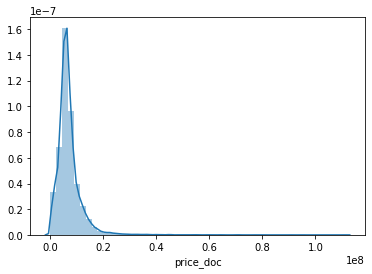

In [34]:
sns.distplot(train.price_doc)

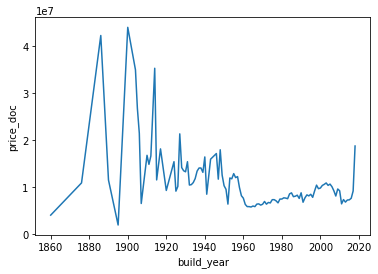

In [12]:
## Price over time
df1 = df.groupby("build_year")["price_doc"].mean().reset_index()
sns.lineplot(df1.build_year, df1.price_doc)

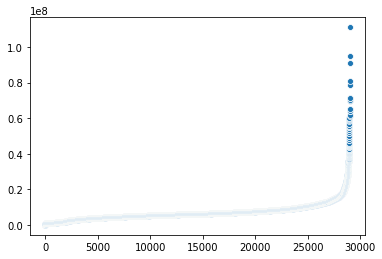

In [13]:
sns.scatterplot(range(df.shape[0]), np.sort(df.price_doc.values))

### Full Square Meters

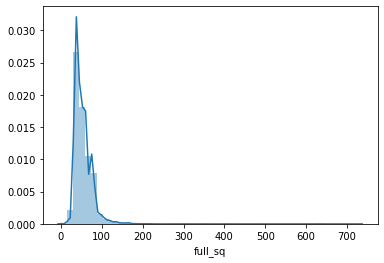

In [14]:
# sns.distplot(df.loc[df["full_sq"] > 1])
sns.distplot(df["full_sq"])

### Life Square Meters

In [19]:
train.drop()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
559,560,2011-12-07,73,NaN,14.0,NaN,NaN,NaN,NaN,NaN,...,34,4,0,17,37,0,8,95,4,10100958
624,625,2011-12-15,110,NaN,26.0,NaN,NaN,NaN,NaN,NaN,...,82,22,3,68,101,1,22,111,14,16118400
783,784,2012-01-12,167,NaN,32.0,NaN,NaN,NaN,NaN,NaN,...,310,128,22,132,196,1,88,164,12,23435712
824,825,2012-01-16,53,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,18,3,0,11,12,0,1,56,5,8794500
834,835,2012-01-17,81,NaN,16.0,NaN,NaN,NaN,NaN,NaN,...,38,8,2,19,37,2,12,77,10,18668824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30450,30453,2015-06-29,65,NaN,5.0,0.0,1.0,NaN,2.0,0.0,...,20,4,0,13,28,1,3,84,5,12610000
30451,30454,2015-06-29,37,NaN,3.0,3.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,2394300
30459,30462,2015-06-29,51,NaN,4.0,17.0,4.0,NaN,2.0,1.0,...,7,2,0,5,14,0,3,17,2,5778893
30465,30468,2015-06-30,52,NaN,13.0,17.0,1.0,NaN,2.0,1.0,...,371,141,26,150,249,2,105,203,13,6750554


ValueError: cannot convert float NaN to integer

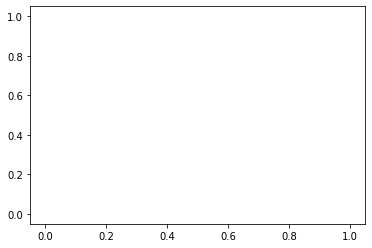

In [26]:
sns.distplot(df["life_sq"])

### 

In [27]:
np.corrcoef(df['price_doc'], df['build_year'])[0, 1]
df['price_doc'].corr(df['build_year'])

0.037830856329818856

In [28]:
high_corr_list = df.corr()["price_doc"].abs().sort_values()[-30:].keys()

items_to_remove = ["trc_sqm_3000", "cafe_count_5000_na_price", "trc_count_3000", "sport_count_3000"]
high_corr_list = list(set(high_corr_list).difference(set(items_to_remove)))
print(high_corr_list)

['basketball_km', 'kremlin_km', 'life_sq', 'num_room', 'cafe_count_5000', 'cafe_count_5000_price_1500', 'sport_objects_raion', 'trc_sqm_5000', 'office_km', 'cafe_count_5000_price_500', 'stadium_km', 'sport_count_5000', 'office_sqm_5000', 'office_sqm_3000', 'sport_count_1500', 'zd_vokzaly_avto_km', 'ttk_km', 'cafe_count_5000_price_2500', 'bulvar_ring_km', 'full_sq', 'sport_count_2000', 'price_doc', 'nuclear_reactor_km', 'cafe_count_5000_price_1000', 'sadovoe_km', 'trc_count_5000']


In [29]:
corr = df[high_corr_list].corr()

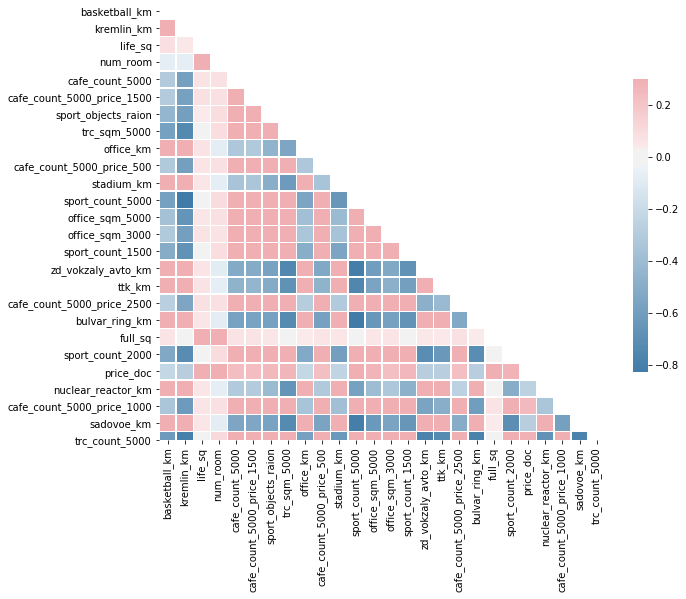

In [30]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6})

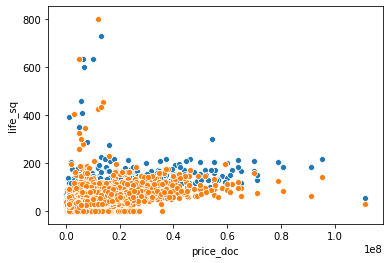

In [31]:
fig, ax = plt.subplots()
sns.scatterplot(df.price_doc, df.full_sq, ax=ax)
sns.scatterplot(df.price_doc, df.life_sq, ax=ax)

In [32]:
df.dtypes

id                             int64
timestamp             datetime64[ns]
full_sq                      float64
life_sq                      float64
floor                        float64
                           ...      
mosque_count_5000              int64
leisure_count_5000             int64
sport_count_5000               int64
market_count_5000              int64
price_doc                    float64
Length: 292, dtype: object